# Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
# tr = training data
tr = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
tr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
# tt = test data
tt = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
tt

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
tr.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
tt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
tr['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [8]:
tt['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [12]:
tr.shape

(8523, 12)

In [13]:
tt.shape

(5681, 11)

# Data Cleaning

In [14]:
tr.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
tt.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Item_weight and outlet_size have null values.

In [16]:
# fill null values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

tr['Item_Weight'] = imp.fit_transform(tr['Item_Weight'].values.reshape(-1,1))
tr['Outlet_Size'] = imp.fit_transform(tr['Outlet_Size'].values.reshape(-1,1))

# for test data
tt['Item_Weight'] = imp.fit_transform(tt['Item_Weight'].values.reshape(-1,1))
tt['Outlet_Size'] = imp.fit_transform(tt['Outlet_Size'].values.reshape(-1,1))

In [17]:
tr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [18]:
tr.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

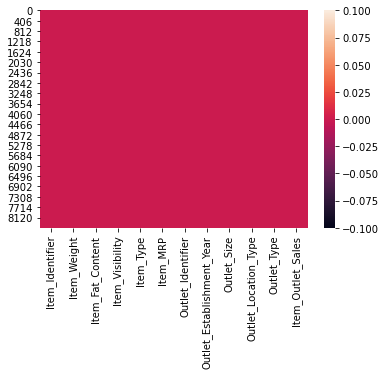

In [24]:
sns.heatmap(tr.isnull())

In [19]:
tt.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

<AxesSubplot:>

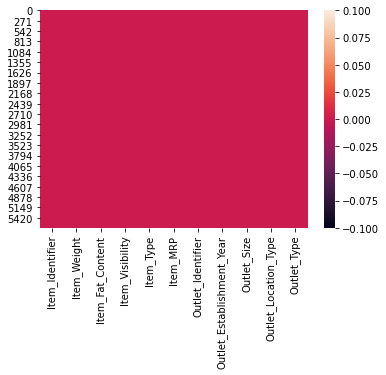

In [25]:
sns.heatmap(tt.isnull())

In [20]:
# Use Label Encoder to convert categorical data

le = LabelEncoder()
list1 = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for df in list1:
    tr[df] = le.fit_transform(tr[df].astype(str))

In [21]:
tr.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [22]:
list2 = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for val in list2:
    tt[val] = le.fit_transform(tt[val].astype(str))

In [23]:
tt.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,10.500,2,0.118599,4,234.2300,5,1985,1,2,3


# Summary Statistics

In [26]:
tr.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.736176,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.234540,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.150000,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


Standard deviation is high in some features, means data is skewed.

In [27]:
tt.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,773.386376,12.318422,1.368773,0.065684,7.233410,141.023273,4.722760,1997.828903,1.170921,1.112832,1.201373
std,445.525926,4.325238,0.641085,0.051252,4.219057,61.809091,2.837201,8.372256,0.600328,0.812824,0.796740
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,382.000000,9.195000,1.000000,0.027047,4.000000,94.412000,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,771.000000,10.500000,1.000000,0.054154,6.000000,141.415400,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1160.000000,15.850000,2.000000,0.093463,10.000000,186.026600,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1542.000000,21.350000,4.000000,0.323637,15.000000,266.588400,9.000000,2009.000000,2.000000,2.000000,3.000000


In [28]:
tr.skew()

Item_Identifier             -0.008877
Item_Weight                  0.175321
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [29]:
tt.skew()

Item_Identifier             -0.000020
Item_Weight                  0.374935
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

# EDA

<AxesSubplot:>

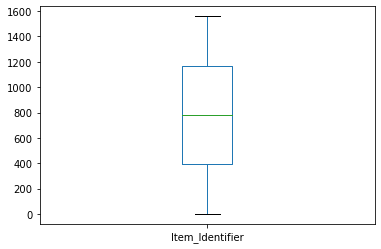

In [33]:
tr['Item_Identifier'].plot.box()

<AxesSubplot:>

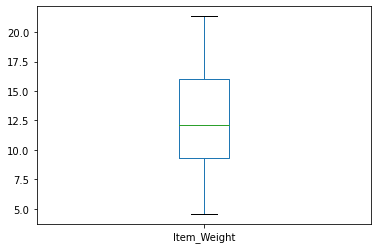

In [34]:
tr['Item_Weight'].plot.box()

<AxesSubplot:>

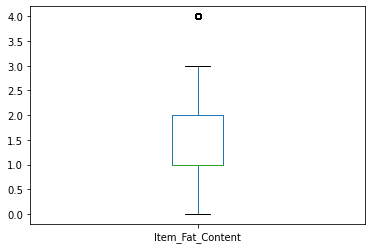

In [35]:
tr['Item_Fat_Content'].plot.box()

this column has outlier.

<AxesSubplot:>

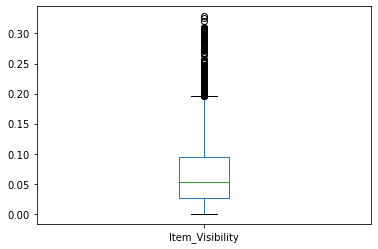

In [37]:
tr['Item_Visibility'].plot.box()

Here we have outliers.

<AxesSubplot:>

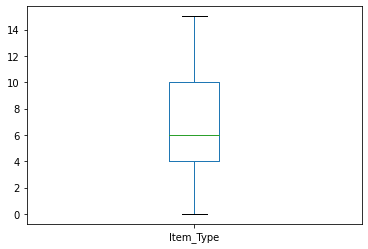

In [38]:
tr['Item_Type'].plot.box()

<AxesSubplot:>

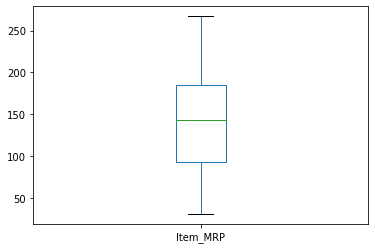

In [39]:
tr['Item_MRP'].plot.box()

<AxesSubplot:>

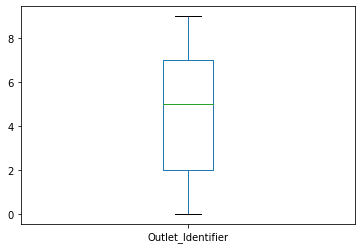

In [40]:
tr['Outlet_Identifier'].plot.box()

<AxesSubplot:>

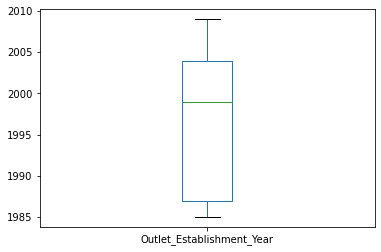

In [41]:
tr['Outlet_Establishment_Year'].plot.box()

<AxesSubplot:>

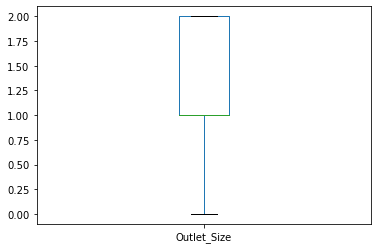

In [42]:
tr['Outlet_Size'].plot.box()

<AxesSubplot:>

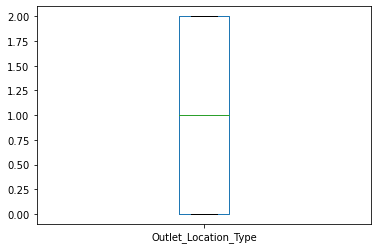

In [43]:
tr['Outlet_Location_Type'].plot.box()

<AxesSubplot:>

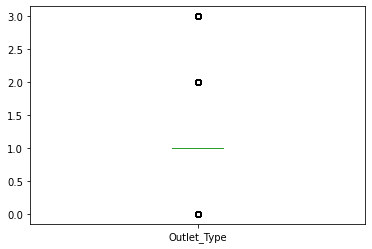

In [44]:
tr['Outlet_Type'].plot.box()

Item_Identifier                 AxesSubplot(0.125,0.536818;0.110714x0.343182)
Item_Weight                  AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Item_Fat_Content             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Item_Visibility              AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Item_Type                    AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Item_MRP                     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Outlet_Identifier                  AxesSubplot(0.125,0.125;0.110714x0.343182)
Outlet_Establishment_Year       AxesSubplot(0.257857,0.125;0.110714x0.343182)
Outlet_Size                     AxesSubplot(0.390714,0.125;0.110714x0.343182)
Outlet_Location_Type            AxesSubplot(0.523571,0.125;0.110714x0.343182)
Outlet_Type                     AxesSubplot(0.656429,0.125;0.110714x0.343182)
Item_Outlet_Sales               AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

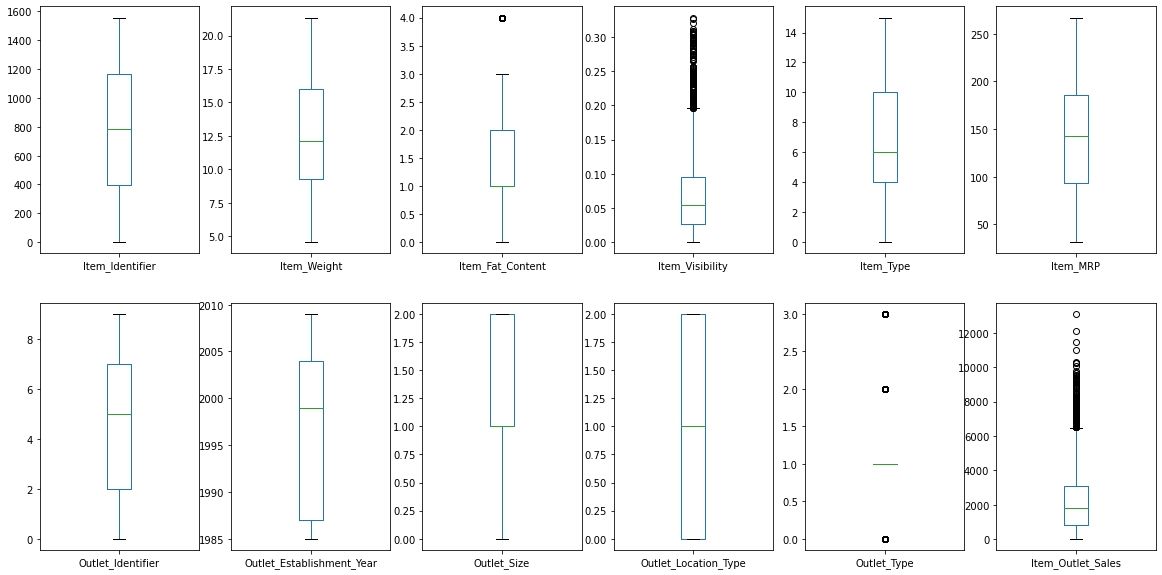

In [51]:
tr.plot(kind ='box', subplots = True, layout = (2,6), figsize = (20,10))

# Correlation

In [46]:
tr.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.043638,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.043638,1.000000,-0.017103,-0.017843,0.028041,0.025258,-0.007118,0.035689,-0.016294,-0.001756,-0.026358,0.006443
Item_Fat_Content,-0.098114,-0.017103,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.017843,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028041,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.025258,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007118,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,0.035689,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.016294,-0.012058,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,-0.001756,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


<AxesSubplot:>

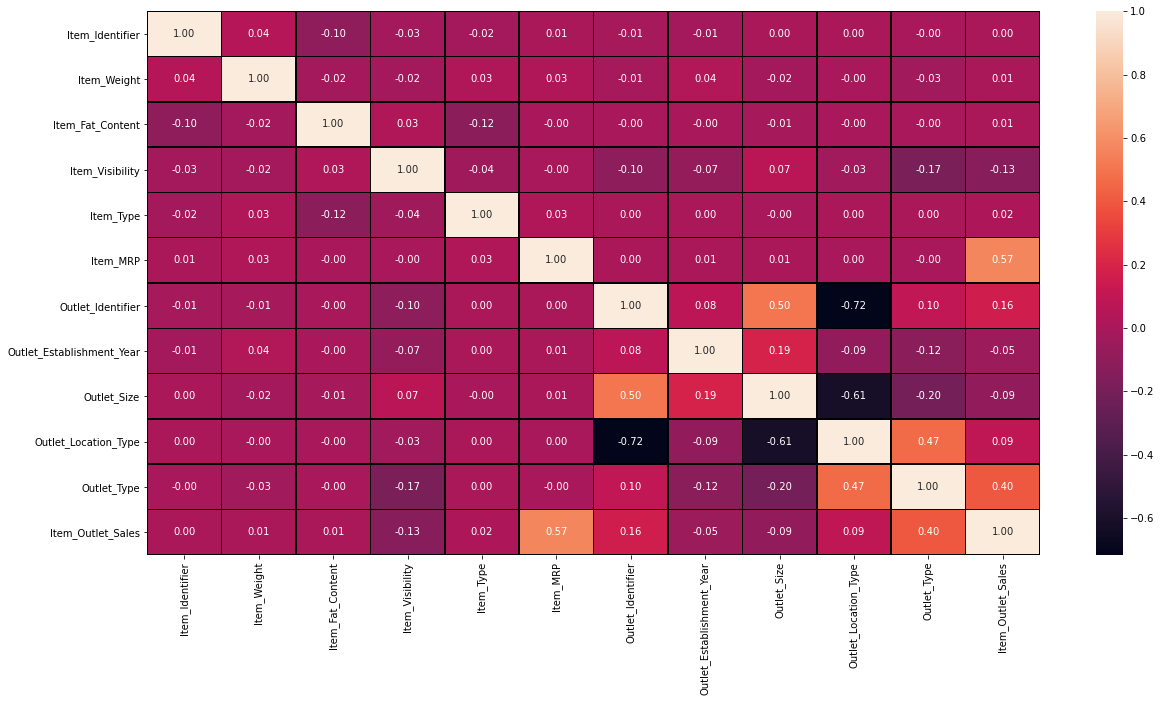

In [48]:
plt.figure(figsize = (20,10))
sns.heatmap(tr.corr(), annot = True, linewidth = .5, linecolor = 'black', fmt = '.2f')

# Normal Distribution Curve

<AxesSubplot:xlabel='Item_Identifier', ylabel='Density'>

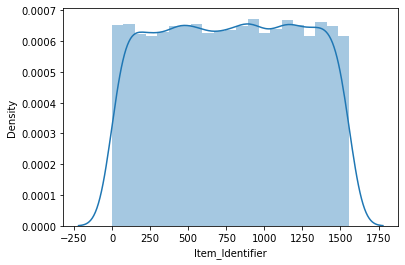

In [66]:
sns.distplot(tr['Item_Identifier'])

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

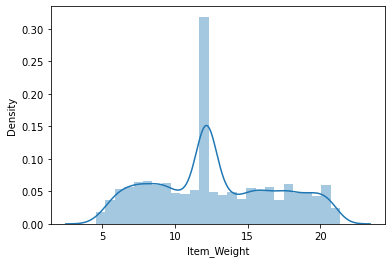

In [67]:
sns.distplot(tr['Item_Weight'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Density'>

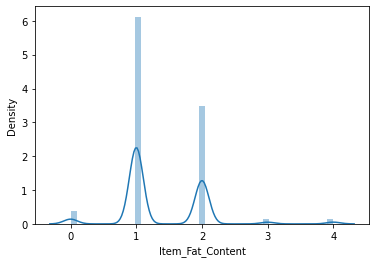

In [68]:
sns.distplot(tr['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

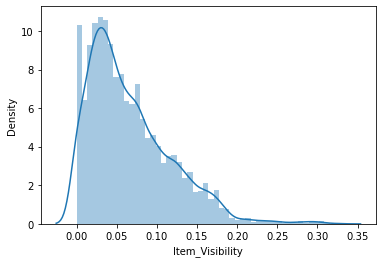

In [69]:
sns.distplot(tr['Item_Visibility'])

<AxesSubplot:xlabel='Item_Type', ylabel='Density'>

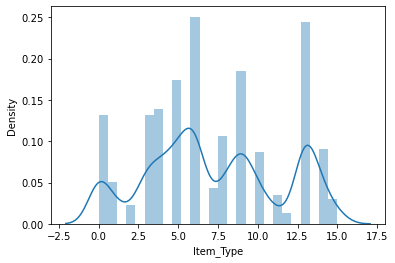

In [70]:
sns.distplot(tr['Item_Type'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

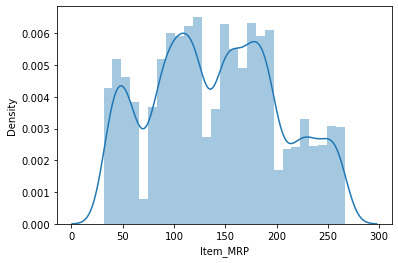

In [71]:
sns.distplot(tr['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Density'>

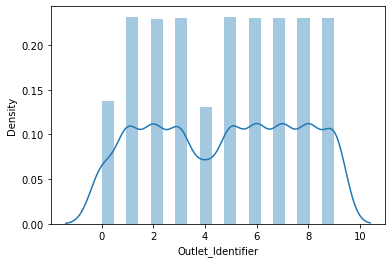

In [72]:
sns.distplot(tr['Outlet_Identifier'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

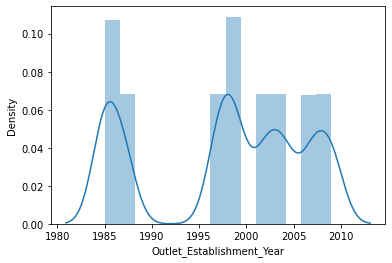

In [73]:
sns.distplot(tr['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='Density'>

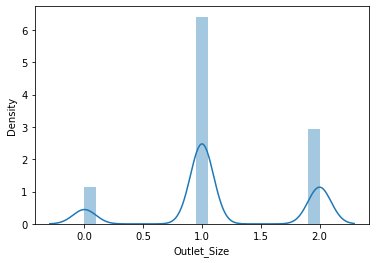

In [74]:
sns.distplot(tr['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Density'>

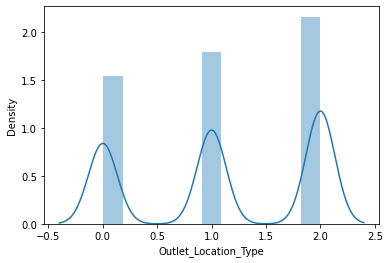

In [75]:
sns.distplot(tr['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='Density'>

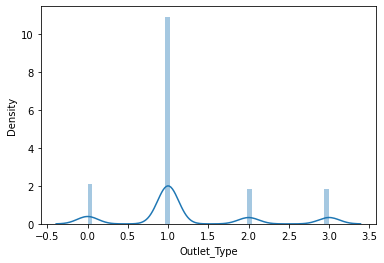

In [76]:
sns.distplot(tr['Outlet_Type'])

The data is not normalised.

# Removing Outliers

In [77]:
from scipy.stats import zscore
z = np.abs(zscore(tr))
z

array([[1.38851383, 0.81151126, 0.57284357, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.71799137, 1.60975569, 0.97809218, ..., 1.09156913, 1.00297245,
        1.01844035],
       [0.26205684, 1.12505806, 0.57284357, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [1.28515188, 0.50449417, 0.57284357, ..., 0.13888236, 0.25265831,
        0.57909963],
       [0.21975905, 1.30510027, 0.97809218, ..., 1.09156913, 1.00297245,
        0.19672492],
       [1.62449099, 0.48740719, 0.57284357, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [78]:
trreshold = 3
print(np.where(z>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [79]:
z[8517][2]

4.079963670566759

In [80]:
tr_new = tr[(z<3).all(axis=1)]
print(tr.shape)
print(tr_new.shape)

(8523, 12)
(8222, 12)


# Calculate Data Loss

In [81]:
loss = (8523-8222)/8523*100
print(loss)

3.5316203214830457


Dividing Data Features and Vectors:

In [84]:
x = tr_new.drop(['Item_Outlet_Sales'], axis = 1)
y = tr_new['Item_Outlet_Sales']

In [85]:
x.shape

(8222, 11)

In [86]:
y.shape

(8222,)

# Transforming Data to Remove Skewness

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.38525904, -0.80893335, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.26058572],
       [-1.71298557, -1.60240113,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.01930425],
       [-0.26478859,  1.11604766, -0.58389405, ..., -0.2799885 ,
        -1.37079631, -0.26058572],
       ...,
       [ 1.2741975 , -0.50375344, -0.58389405, ...,  1.3809534 ,
        -0.13578784, -0.26058572],
       [-0.22271559, -1.29956876,  1.17592152, ..., -0.2799885 ,
         1.09922062,  1.01930425],
       [-1.6199821 ,  0.48221245, -0.58389405, ...,  1.3809534 ,
        -1.37079631, -0.26058572]])

# Splitting Data

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

# Model

In [90]:
# Creating xgboost Model
from xgboost.sklearn import XGBRegressor

In [114]:
XGB = XGBRegressor()
XGB.fit(x_train ,y_train)
pred = XGB.predict(x_test)

In [115]:
XGB.score(x_train, y_train)

0.8562224888321665

In [113]:
pred

array([2835.0986,  798.6088, 2420.2124, ..., 1262.3589, 1635.2646,
       1403.7999], dtype=float32)

In [94]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(x_train, y_train)
pred1 = lr.predict(x_test)

In [105]:
lr.score(x_train, y_train)

0.4978595633456814

In [95]:
from sklearn.svm import SVR 
reg = SVR() 
reg.fit(x_train, y_train) 
pred1 = reg.predict(x_test)

In [106]:
reg.score(x_train, y_train)

0.05215712298476671

In [96]:
pred1

array([1699.47113162, 1600.5613585 , 1797.31482911, ..., 1808.91934536,
       1800.83099259, 1896.04733212])

In [98]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, pred1))

In [99]:
rmse

1575.7271246984872

In [107]:
# predicting on actual test data
x_t = tt
y_result = XGB.predict(x_t)

In [108]:
y_result

array([4536.56  , 5450.585 , 5397.4585, ..., 5209.656 , 4328.917 ,
       6635.864 ], dtype=float32)

# Model Saving:

In [109]:
import pickle
filename = 'Big Data Mart Prediction.pkl'
pickle.dump(lr, open(filename, 'wb'))